<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-09-01 13:41:11.977807


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print(us['confirmed'].sum())
    print('US Deaths')
    print(us['deaths'].sum())
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('')

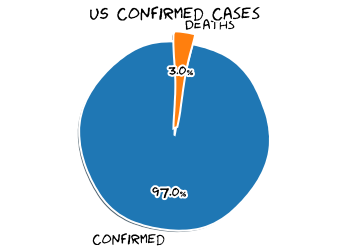

US Population
330362592
US Confirmed
6031424
US Deaths
183353
6031424 (1.825698231596391% of population)

New York City Confirmed
0
New York City Deaths
0

Philippines Confirmed
224264
Philippines Deaths
3597



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

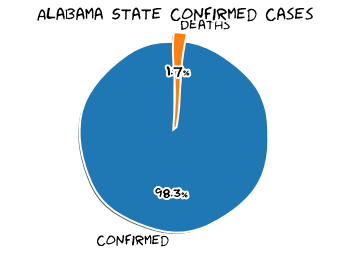

Alabama State Total Population
4887871
Alabama State Confirmed
126058 (2.5789960496093287% of population)
Alabama State Deaths
2182 (1.7309492455853657% of confirmed)



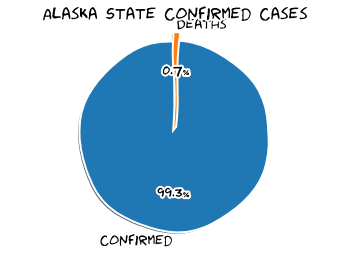

Alaska State Total Population
737438
Alaska State Confirmed
5263 (0.7136871167474418% of population)
Alaska State Deaths
37 (0.703021090632719% of confirmed)



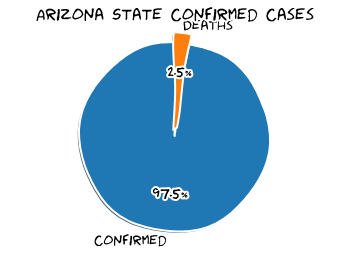

Arizona State Total Population
7171646
Arizona State Confirmed
201835 (2.8143469435050195% of population)
Arizona State Deaths
5028 (2.491143756038348% of confirmed)



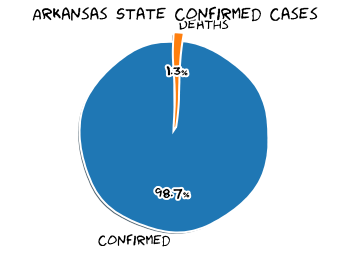

Arkansas State Total Population
3013825
Arkansas State Confirmed
61224 (2.0314384544557162% of population)
Arkansas State Deaths
797 (1.3017770808833138% of confirmed)



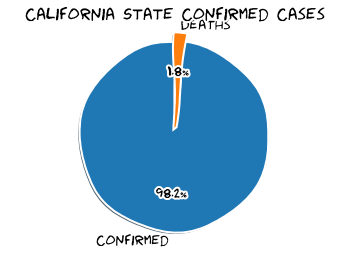

California State Total Population
39557045
California State Confirmed
712597 (1.8014414372964411% of population)
California State Deaths
13021 (1.8272600081111763% of confirmed)



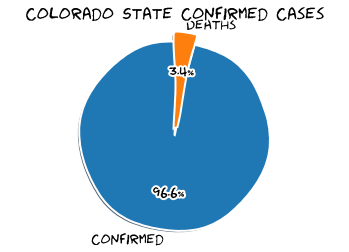

Colorado State Total Population
5695564
Colorado State Confirmed
57404 (1.0078720913328338% of population)
Colorado State Deaths
1945 (3.3882656260887747% of confirmed)



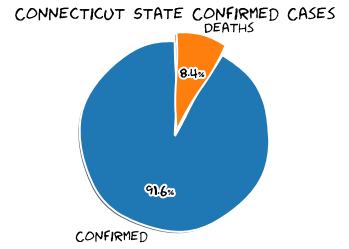

Connecticut State Total Population
3572665
Connecticut State Confirmed
52879 (1.4800995895221076% of population)
Connecticut State Deaths
4465 (8.443805669547459% of confirmed)



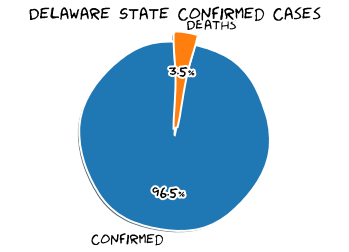

Delaware State Total Population
967171
Delaware State Confirmed
17429 (1.8020598218929227% of population)
Delaware State Deaths
605 (3.4712261173905556% of confirmed)



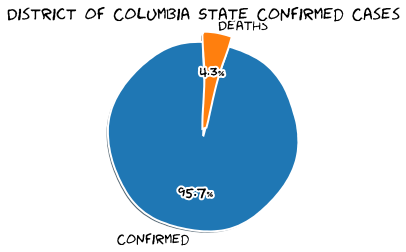

District of Columbia State Total Population
702455
District of Columbia State Confirmed
13992 (1.9918713654255433% of population)
District of Columbia State Deaths
607 (4.338193253287593% of confirmed)



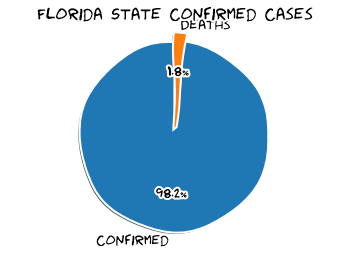

Florida State Total Population
21299325
Florida State Confirmed
623471 (2.92718665967114% of population)
Florida State Deaths
11187 (1.794309599003001% of confirmed)



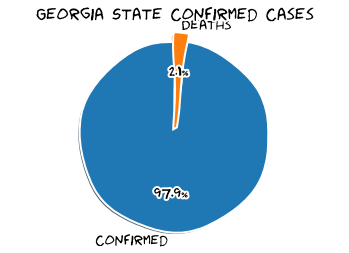

Georgia State Total Population
10519475
Georgia State Confirmed
270471 (2.5711454231318576% of population)
Georgia State Deaths
5633 (2.082663206036876% of confirmed)



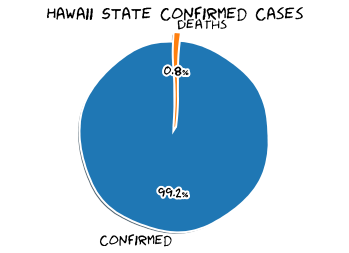

Hawaii State Total Population
1420491
Hawaii State Confirmed
8472 (0.5964134936440991% of population)
Hawaii State Deaths
70 (0.8262511803588292% of confirmed)



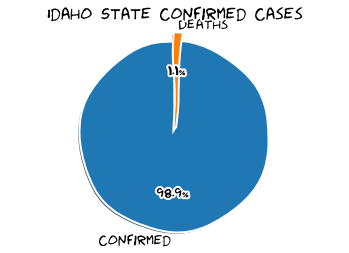

Idaho State Total Population
1754208
Idaho State Confirmed
32081 (1.8288025137269923% of population)
Idaho State Deaths
361 (1.1252766434961503% of confirmed)



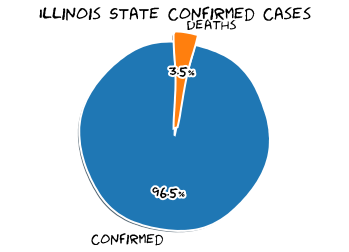

Illinois State Total Population
12741080
Illinois State Confirmed
236724 (1.8579586659843592% of population)
Illinois State Deaths
8235 (3.478734729051554% of confirmed)



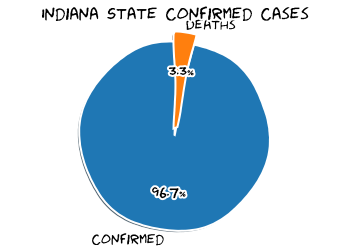

Indiana State Total Population
6691878
Indiana State Confirmed
94196 (1.4076168154888657% of population)
Indiana State Deaths
3077 (3.2665930612764877% of confirmed)



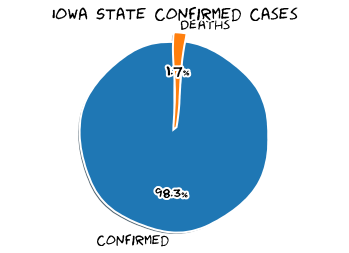

Iowa State Total Population
3156145
Iowa State Confirmed
65396 (2.0720214058606303% of population)
Iowa State Deaths
1120 (1.712642975105511% of confirmed)



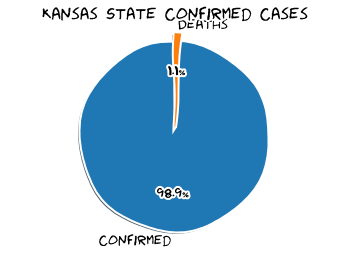

Kansas State Total Population
2911510
Kansas State Confirmed
42599 (1.4631239459936596% of population)
Kansas State Deaths
451 (1.0587102983638113% of confirmed)



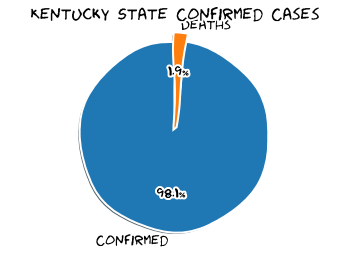

Kentucky State Total Population
4468402
Kentucky State Confirmed
48396 (1.0830717558536587% of population)
Kentucky State Deaths
933 (1.9278452764691298% of confirmed)



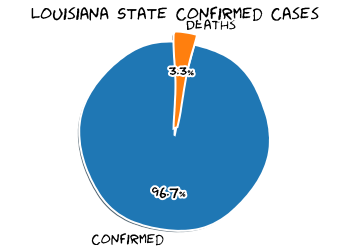

Louisiana State Total Population
4659978
Louisiana State Confirmed
148193 (3.1801223095903026% of population)
Louisiana State Deaths
4950 (3.3402387427206417% of confirmed)



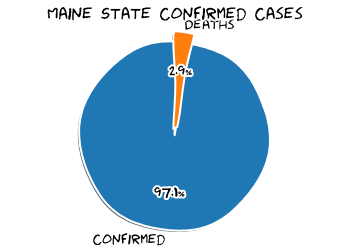

Maine State Total Population
1338404
Maine State Confirmed
4529 (0.33838811001760305% of population)
Maine State Deaths
132 (2.914550673437845% of confirmed)



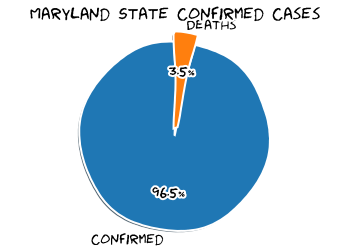

Maryland State Total Population
6042718
Maryland State Confirmed
108249 (1.7913958586185885% of population)
Maryland State Deaths
3747 (3.461463847241083% of confirmed)



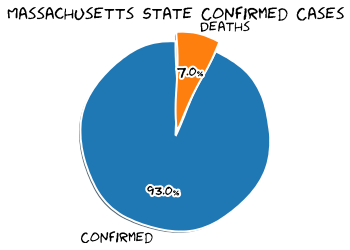

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
128533 (1.8622171152781548% of population)
Massachusetts State Deaths
9060 (7.048773466736169% of confirmed)



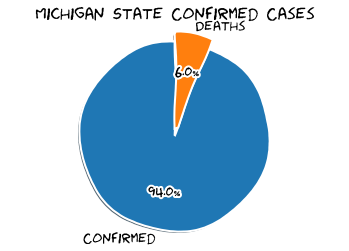

Michigan State Total Population
9995915
Michigan State Confirmed
113025 (1.1307118958094382% of population)
Michigan State Deaths
6753 (5.974784339747844% of confirmed)



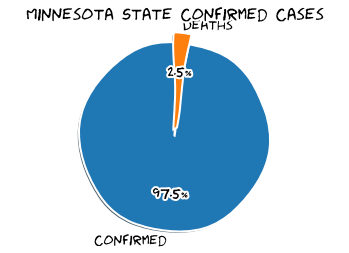

Minnesota State Total Population
5611179
Minnesota State Confirmed
75864 (1.352015325121512% of population)
Minnesota State Deaths
1866 (2.4596646630813033% of confirmed)



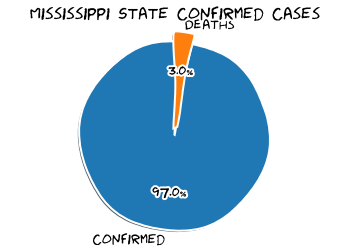

Mississippi State Total Population
2986530
Mississippi State Confirmed
82950 (2.777470844089964% of population)
Mississippi State Deaths
2473 (2.981314044605184% of confirmed)



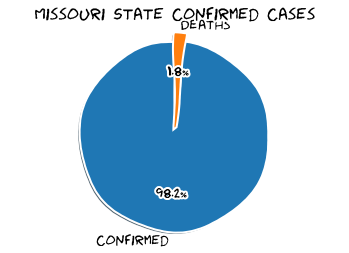

Missouri State Total Population
6126452
Missouri State Confirmed
85635 (1.3977910869129473% of population)
Missouri State Deaths
1547 (1.806504349856951% of confirmed)



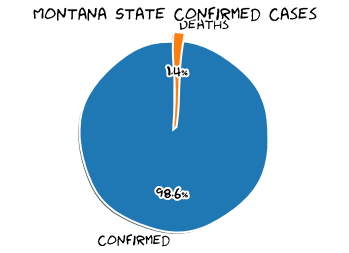

Montana State Total Population
1062305
Montana State Confirmed
7421 (0.6985752679315262% of population)
Montana State Deaths
104 (1.4014283789246733% of confirmed)



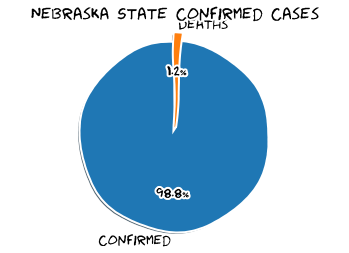

Nebraska State Total Population
1929268
Nebraska State Confirmed
34287 (1.7772025452140399% of population)
Nebraska State Deaths
397 (1.157873246419926% of confirmed)



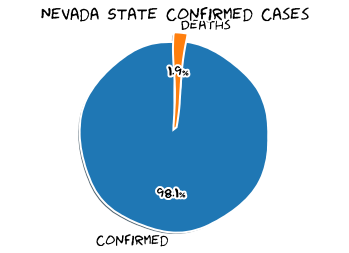

Nevada State Total Population
3034392
Nevada State Confirmed
69228 (2.2814455086883965% of population)
Nevada State Deaths
1305 (1.8850754030161208% of confirmed)



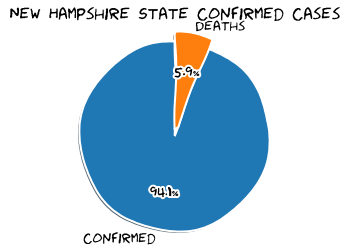

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
7275 (0.5363232772411678% of population)
New Hampshire State Deaths
432 (5.938144329896907% of confirmed)



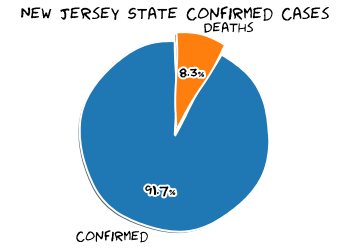

New Jersey State Total Population
8908520
New Jersey State Confirmed
191960 (2.154791143759008% of population)
New Jersey State Deaths
15945 (8.306418003750782% of confirmed)



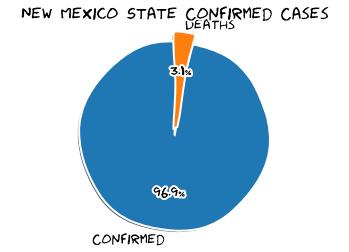

New Mexico State Total Population
2095428
New Mexico State Confirmed
25352 (1.2098721597687918% of population)
New Mexico State Deaths
779 (3.072735878826128% of confirmed)



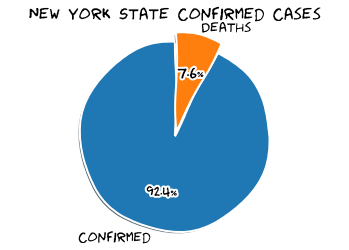

New York State Total Population
19542209
New York State Confirmed
434756 (2.2247024376824545% of population)
New York State Deaths
32936 (7.575743635510493% of confirmed)



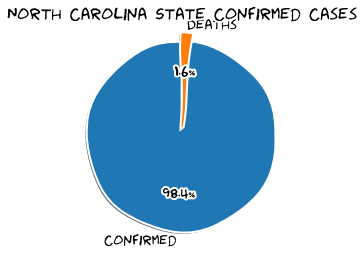

North Carolina State Total Population
10383620
North Carolina State Confirmed
167309 (1.6112781476980091% of population)
North Carolina State Deaths
2702 (1.6149758829471217% of confirmed)



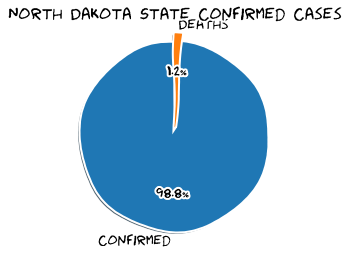

North Dakota State Total Population
760077
North Dakota State Confirmed
12000 (1.5787874123279617% of population)
North Dakota State Deaths
145 (1.2083333333333333% of confirmed)



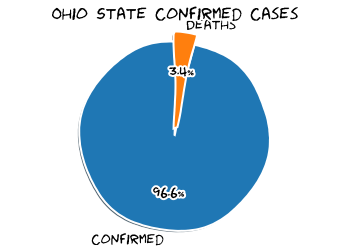

Ohio State Total Population
11689442
Ohio State Confirmed
123155 (1.0535575607458423% of population)
Ohio State Deaths
4139 (3.360805489017904% of confirmed)



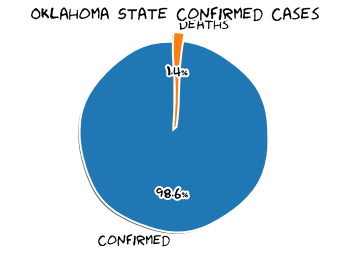

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
58733 (1.4895212599088175% of population)
Oklahoma State Deaths
800 (1.3620962661536105% of confirmed)



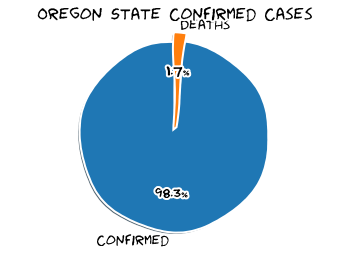

Oregon State Total Population
4190713
Oregon State Confirmed
26713 (0.6374332959570363% of population)
Oregon State Deaths
459 (1.7182645154044847% of confirmed)



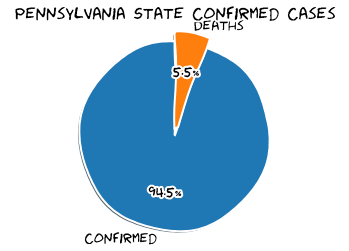

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
138795 (1.0837381881555954% of population)
Pennsylvania State Deaths
7659 (5.518210310169675% of confirmed)



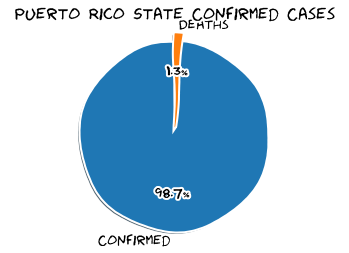

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
33421 (1.045990598885249% of population)
Puerto Rico State Deaths
435 (1.3015768528769336% of confirmed)



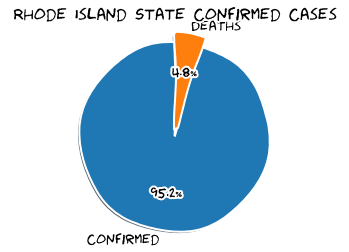

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
21949 (2.075918718641086% of population)
Rhode Island State Deaths
1048 (4.774704997949793% of confirmed)



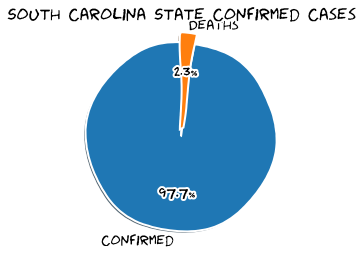

South Carolina State Total Population
5084127
South Carolina State Confirmed
118992 (2.340460810676051% of population)
South Carolina State Deaths
2720 (2.2858679575097485% of confirmed)



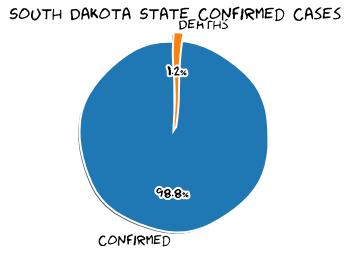

South Dakota State Total Population
882235
South Dakota State Confirmed
13509 (1.531224673698051% of population)
South Dakota State Deaths
167 (1.2362128951069657% of confirmed)



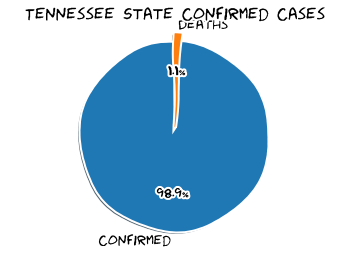

Tennessee State Total Population
6770010
Tennessee State Confirmed
154933 (2.2885195147422235% of population)
Tennessee State Deaths
1754 (1.1321022635590867% of confirmed)



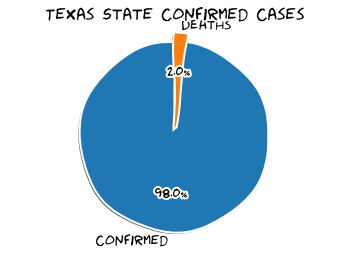

Texas State Total Population
28701845
Texas State Confirmed
632739 (2.2045237858402484% of population)
Texas State Deaths
12779 (2.019632107393412% of confirmed)



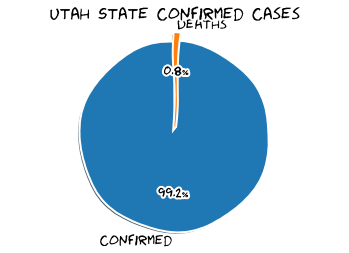

Utah State Total Population
3161105
Utah State Confirmed
52107 (1.6483792850917638% of population)
Utah State Deaths
407 (0.7810850749419463% of confirmed)



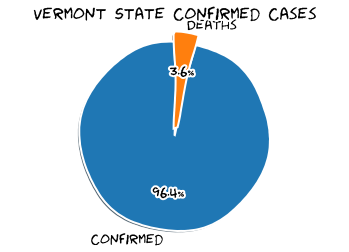

Vermont State Total Population
626299
Vermont State Confirmed
1624 (0.25930106865889935% of population)
Vermont State Deaths
58 (3.571428571428571% of confirmed)



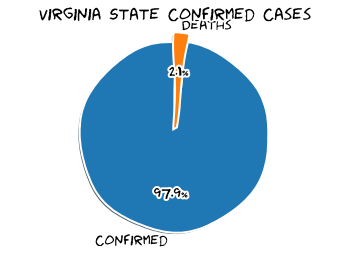

Virginia State Total Population
8517685
Virginia State Confirmed
120575 (1.4155841640070044% of population)
Virginia State Deaths
2580 (2.139747045407423% of confirmed)



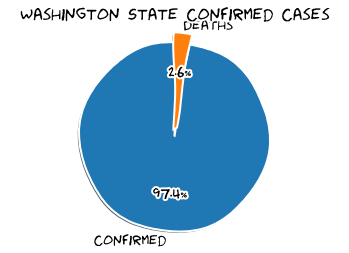

Washington State Total Population
7535591
Washington State Confirmed
74635 (0.9904332652873543% of population)
Washington State Deaths
1915 (2.5658203255845113% of confirmed)



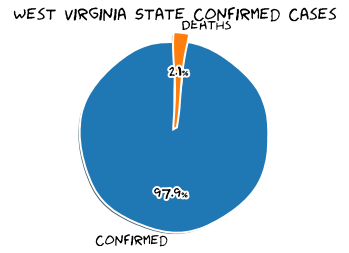

West Virginia State Total Population
1805832
West Virginia State Confirmed
10249 (0.5675500268020502% of population)
West Virginia State Deaths
215 (2.097765635671773% of confirmed)



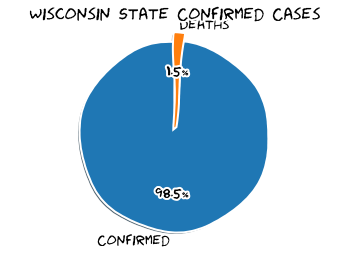

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
75603 (1.3004578255556656% of population)
Wisconsin State Deaths
1122 (1.4840680925360106% of confirmed)



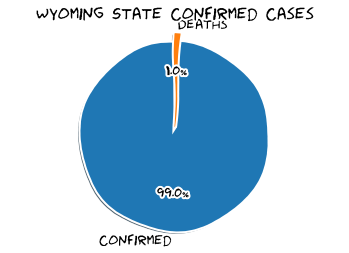

Wyoming State Total Population
577737
Wyoming State Confirmed
3850 (0.6663931858267689% of population)
Wyoming State Deaths
37 (0.9610389610389611% of confirmed)



In [12]:
for i in states:
    state_details(i)

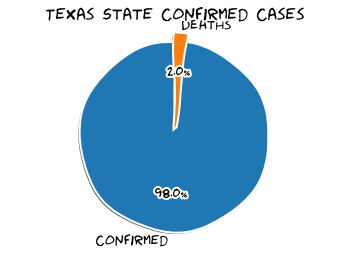

Texas State Total Population
28701845
Texas State Confirmed
632739 (2.2045237858402484% of population)
Texas State Deaths
12779 (2.019632107393412% of confirmed)



In [13]:
state_details('Texas')

In [14]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 25516378},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 851154},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-09-01T12:28:30.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 16863597},
 'source': 'https://github.com/mathdroid/covid19'}

In [15]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [16]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-09-01 04:28:31,33.93911,67.709953,38165,1402,29089,7674,Afghanistan,98.039112429682,3.673522861260317
1,,,,Albania,2020-09-01 04:28:31,41.1533,20.1683,9513,284,5214,4015,Albania,330.5650149419696,2.985388415851992
2,,,,Algeria,2020-09-01 04:28:31,28.0339,1.6596,44494,1510,31244,11740,Algeria,101.46622966299795,3.3937160066525824
3,,,,Andorra,2020-09-01 04:28:31,42.5063,1.5218,1176,53,908,215,Andorra,1522.034556396816,4.506802721088436
4,,,,Angola,2020-09-01 04:28:31,-11.2027,17.8739,2654,108,1071,1475,Angola,8.075148660018229,4.069329314242653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,,,,West Bank and Gaza,2020-09-01 04:28:31,31.9522,35.2332,22729,152,15056,7521,West Bank and Gaza,445.54296297341756,0.6687491750626953
3950,,,,Western Sahara,2020-09-01 04:28:31,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3951,,,,Yemen,2020-09-01 04:28:31,15.552727,48.516388,1958,566,1131,261,Yemen,6.5647492145099875,28.907048008171603
3952,,,,Zambia,2020-09-01 04:28:31,-13.133897,27.849332,12097,288,11469,340,Zambia,65.80194164955573,2.380755559229561


In [17]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1598963310000,34.308284,-118.228241,241808,0,5784,236024,Los Angeles,06037,"Los Angeles, California, US",2408.660452,None,None,84006037,USA
1,Florida,US,1598963310000,25.611236,-80.551706,156910,0,2437,154473,Miami-Dade,12086,"Miami-Dade, Florida, US",5775.247153,None,None,84012086,USA
2,Arizona,US,1598963310000,33.348359,-112.491815,133728,0,2961,130767,Maricopa,04013,"Maricopa, Arizona, US",2981.397035,None,None,84004013,USA
3,Illinois,US,1598963310000,41.841448,-87.816588,126577,0,5058,121519,Cook,17031,"Cook, Illinois, US",2457.694632,None,None,84017031,USA
4,Texas,US,1598963310000,29.858649,-95.393395,106595,0,2192,104403,Harris,48201,"Harris, Texas, US",2261.566941,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,Kansas,US,1598963310000,39.785258,-101.076162,1,0,0,1,Rawlins,20153,"Rawlins, Kansas, US",39.525692,None,None,84020153,USA
3222,Montana,US,1598963310000,46.860480,-105.379384,1,0,0,1,Prairie,30079,"Prairie, Montana, US",92.850511,None,None,84030079,USA
3223,Nebraska,US,1598963310000,41.568961,-101.695956,1,0,0,1,Arthur,31005,"Arthur, Nebraska, US",215.982721,None,None,84031005,USA
3224,Nebraska,US,1598963310000,42.879907,-99.713437,1,0,0,1,Keya Paha,31103,"Keya Paha, Nebraska, US",124.069479,None,None,84031103,USA


In [18]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
7,New York,US,1598963310000,40.710881,-73.816847,70222,0,7222,63000,Queens,36081,"Queens, New York, US",3115.635501,None,None,84036081,USA
8,New York,US,1598963310000,40.636182,-73.949356,64998,0,7290,57708,Kings,36047,"Kings, New York, US",2539.080582,None,None,84036047,USA
11,New York,US,1598963310000,40.852093,-73.862828,51610,0,4909,46701,Bronx,36005,"Bronx, New York, US",3639.102049,None,None,84036005,USA
15,New York,US,1598963310000,40.883201,-72.801217,44820,0,2002,42818,Suffolk,36103,"Suffolk, New York, US",3035.349428,None,None,84036103,USA
16,New York,US,1598963310000,40.740665,-73.589419,44677,0,2198,42479,Nassau,36059,"Nassau, New York, US",3292.520436,None,None,84036059,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,New York,US,1598963310000,42.635055,-77.103699,62,0,7,55,Yates,36123,"Yates, New York, US",248.866054,None,None,84036123,USA
2645,New York,US,1598963310000,44.590409,-74.299260,58,0,0,58,Franklin,36033,"Franklin, New York, US",115.948982,None,None,84036033,USA
2705,New York,US,1598963310000,43.784416,-75.449040,49,0,0,49,Lewis,36049,"Lewis, New York, US",186.340128,None,None,84036049,USA
2910,New York,US,1598963310000,42.391840,-76.877330,26,0,0,26,Schuyler,36097,"Schuyler, New York, US",146.009996,None,None,84036097,USA


In [19]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

434756

In [20]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [21]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
20,None,Philippines,1598963310000,12.879721,121.774017,224264,158012,3597,62655,None,None,Philippines,204.655758,None,None,608,PHL,PH


In [22]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
